변수 (variable)를 기준으로 1개를 분석하는 일변량, 2개 이상을 분석하는 다변량 분석

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./data/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.drop([df.columns[0]],axis=1, inplace=True)

In [5]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
# 통계량 확인
df.describe()
'''
count - 유효한 데이터의 수
mean - 평균
std - 표준편차 : 평균에서 얼마나 퍼저 있는지
min - 최소
25% - 1사분위수 - 오름차순 기준 데이터의 25%에 위치하는 값
50% - 2사분위수
75% - 3사분위수
max - 최댓값
unique - 해당 컬럼에서 고유한 데이터의 수, 중복을 제외한 키 값의 수
top - 최빈값, 제일 카운트가 많은 키
freq - 해당 컬럼에서 최빈값의 수
'''

'\ncount - 유효한 데이터의 수\nmean - 평균\nstd - 표준편차 : 평균에서 얼마나 퍼저 있는지\nmin - 최소\n25% - 1사분위수 - 오름차순 기준 데이터의 25%에 위치하는 값\n50% - 2사분위수\n75% - 3사분위수\nmax - 최댓값\nunique - 해당 컬럼에서 고유한 데이터의 수, 중복을 제외한 키 값의 수\ntop - 최빈값, 제일 카운트가 많은 키\nfreq - 해당 컬럼에서 최빈값의 수\n'

In [7]:
df.describe(include='all')
'''
unique - 해당 컬럼에서 고유한 데이터의 수
top - 최빈값
freq - 해당 컬럼에서 최빈값의 수
'''

'\nunique - 해당 컬럼에서 고유한 데이터의 수\ntop - 최빈값\nfreq - 해당 컬럼에서 최빈값의 수\n'

In [8]:
# 범주용 데이터에 많이 사용
print(df['airline'].value_counts())
print(df['source_city'].value_counts())
print(df['destination_city'].value_counts())

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64


In [ ]:
# 상관계수란? a라는 값에 따라 b도 함께 선형적으로 어떻게 변하는지를 나타낸 수치
# -1 ~ 1 사이의 값을 가지고 0은 아예 상관 없음
df[['duration','days_left','price']].corr()
# 남은 날짜가 작아질수록 가격은 올라간다.
# 가격이 올라가면 비행 시간도 길어진다.


,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [ ]:
df_eco= df[(df['class'] == 'Economy')]
df_eco[['duration','days_left','price']].corr()
# 이코노이에서는 비행시간이 길어지면, 가격이 커짐
# 남은 날짜가 많으면 가격은 올라감

,duration,days_left,price
duration,1.000000,-0.042537,0.288379
days_left,-0.042537,1.000000,-0.559551
price,0.288379,-0.559551,1.000000


In [15]:
pd.crosstab(df['source_city'], df['departure_time'])

departure_time,Afternoon,Early_Morning,Evening,Late_Night,Morning,Night
source_city,,,,,,
Bangalore,5183,13611,14243,457,12323,6244
Chennai,5807,9319,5402,72,10550,7550
Delhi,11234,12248,16790,357,13679,7035
Hyderabad,7221,8524,5991,38,9923,9109
Kolkata,7863,8133,9594,114,12065,8578
Mumbai,10486,14955,13082,268,12606,9499


카이제곱 검정 $x^w = \sum(확인값 - 기댓값)/기댓값$
확인된 빈도와 기대되는 빈도가 다른지 여부를 검정

In [16]:
!pip install matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# matplotlib을 쓸 떈 3가지 기억 : figure : 시각화 하는 영역을 지정, plot : 시각화 내용을 표기, show : 화면 출력
# 선그래프는 시간이나 순서에 따른 연속적인 변화량을 관찰할 때 주로 사용되는 그래프
days_left = df.groupby('days_left').mean(numeric_only=True)
days_left.head()

,duration,price
days_left,,
1,14.250228,21591.867151
2,14.111080,30211.299801
3,14.287476,28976.083569
4,13.742667,25730.905653
5,12.921970,26679.773368


In [20]:
import matplotlib.pyplot as plt

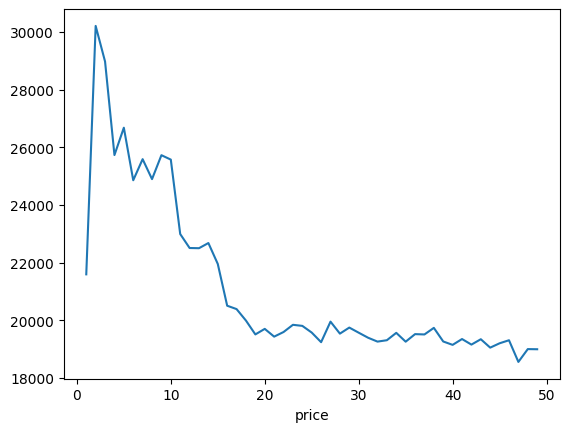

In [22]:
plt.figure()
plt.plot(day_left['price'])
plt.xlabel('Days_left')
plt.xlabel('price')
plt.show()

In [24]:
airline = df.groupby(['airline']).mean(numeric_only=True)

In [25]:
airline

,duration,days_left,price
airline,,,
AirAsia,8.941714,27.735184,4091.072742
Air_India,15.504235,25.497466,23507.019112
GO_FIRST,8.755380,27.430415,5652.007595
Indigo,5.795197,26.264309,5324.216303
SpiceJet,12.579767,24.122850,6179.278881
Vistara,13.326634,25.894532,30396.536302


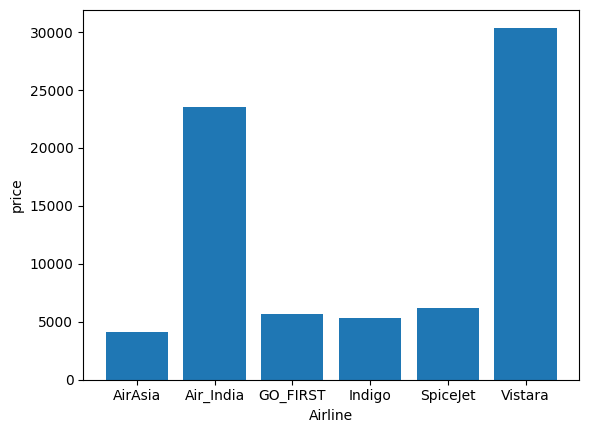

In [28]:
label = airline.index
plt.figure()
plt.bar(label,airline['price'])
plt.xlabel('Airline')
plt.ylabel('price')
plt.show()

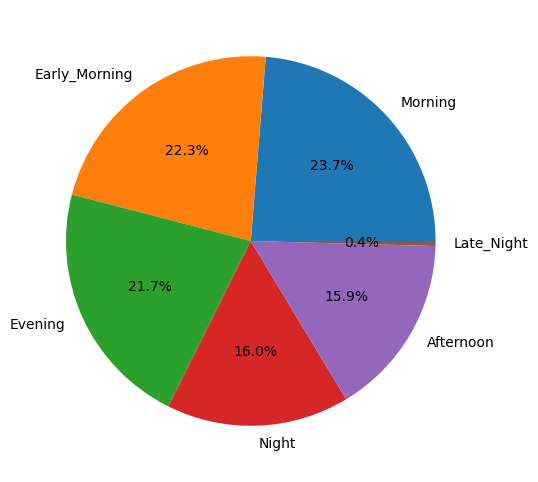

In [29]:
departure_time = df['departure_time'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(departure_time, labels=departure_time.index, autopct='%.1f%%')
plt.show()

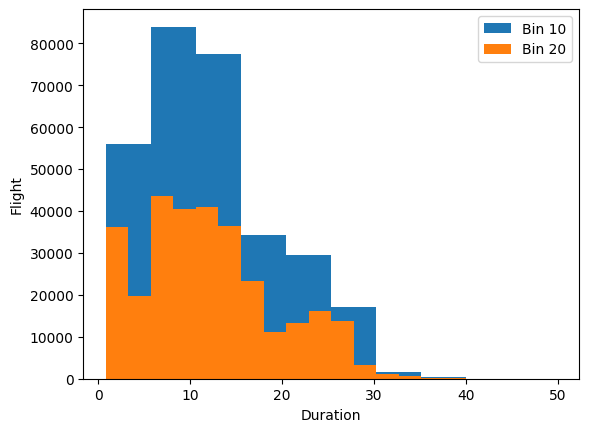

In [ ]:
plt.figure()
plt.hist(df['duration'],bins=10)
plt.hist(df['duration'],bins=20)
plt.xlabel("Duration")
plt.ylabel("Flight")
plt.legend(('Bin 10','Bin 20'))
plt.show()
# 빈도나 빈도 밀도를 확인하기 좋음

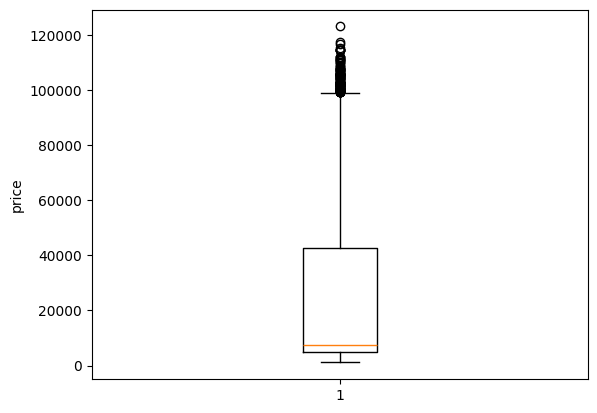

In [ ]:
plt.figure()

plt.boxplot(list(df['price']))
plt.ylabel("price")
plt.show()
# 밖에 값들은 이상치, 밑에부터 순서대로 최솟값, 1사분위,2사분위,3사분위,최댓값
# IQR : 제 3분위수에서 제 1분위수를 뺀 값

<Axes: title={'center': 'price'}, xlabel='departure_time'>

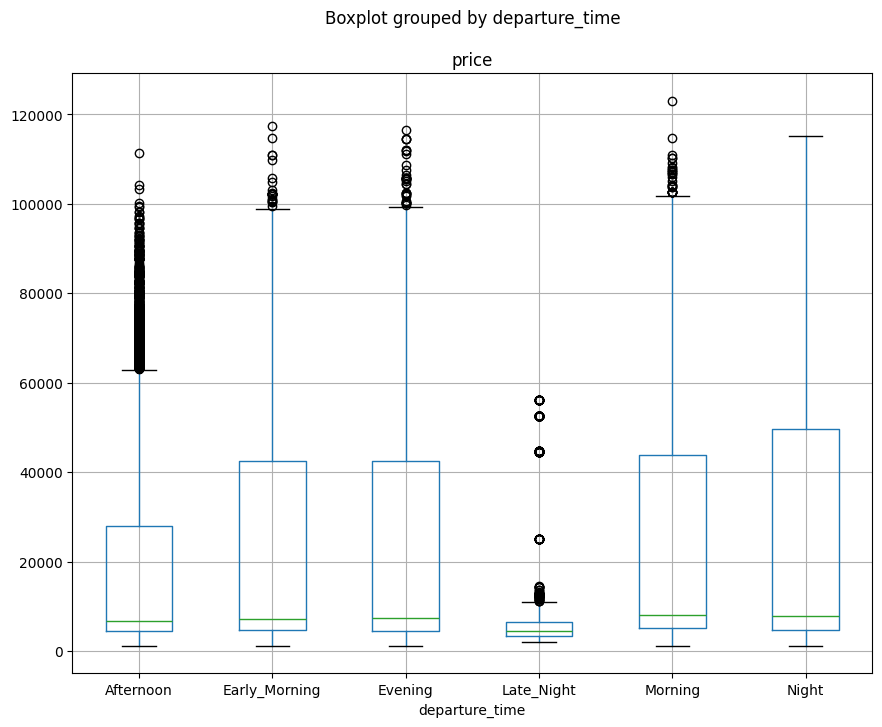

In [33]:
df.boxplot(by="departure_time",column="price",figsize=(10,8))

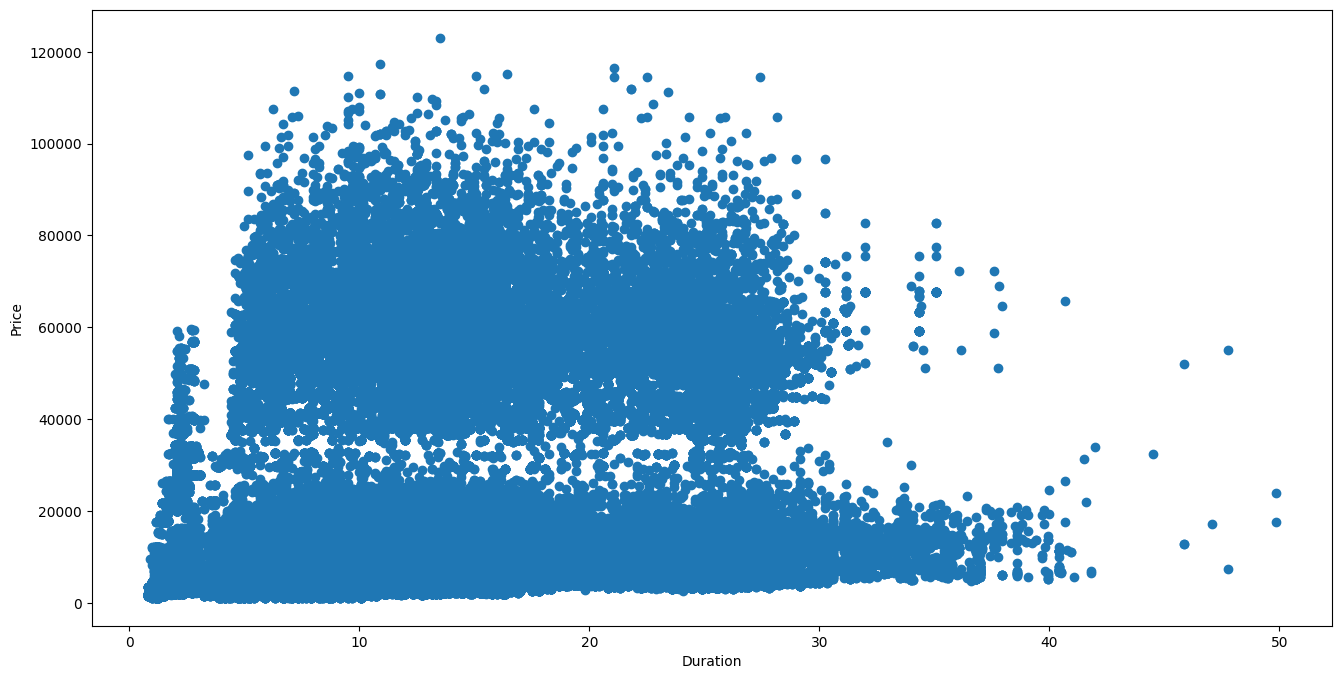

In [34]:
plt.figure(figsize=(16,8))

plt.scatter(y=df["price"], x = df["duration"])
plt.xlabel("Duration")
plt.ylabel("Price")
plt.show()

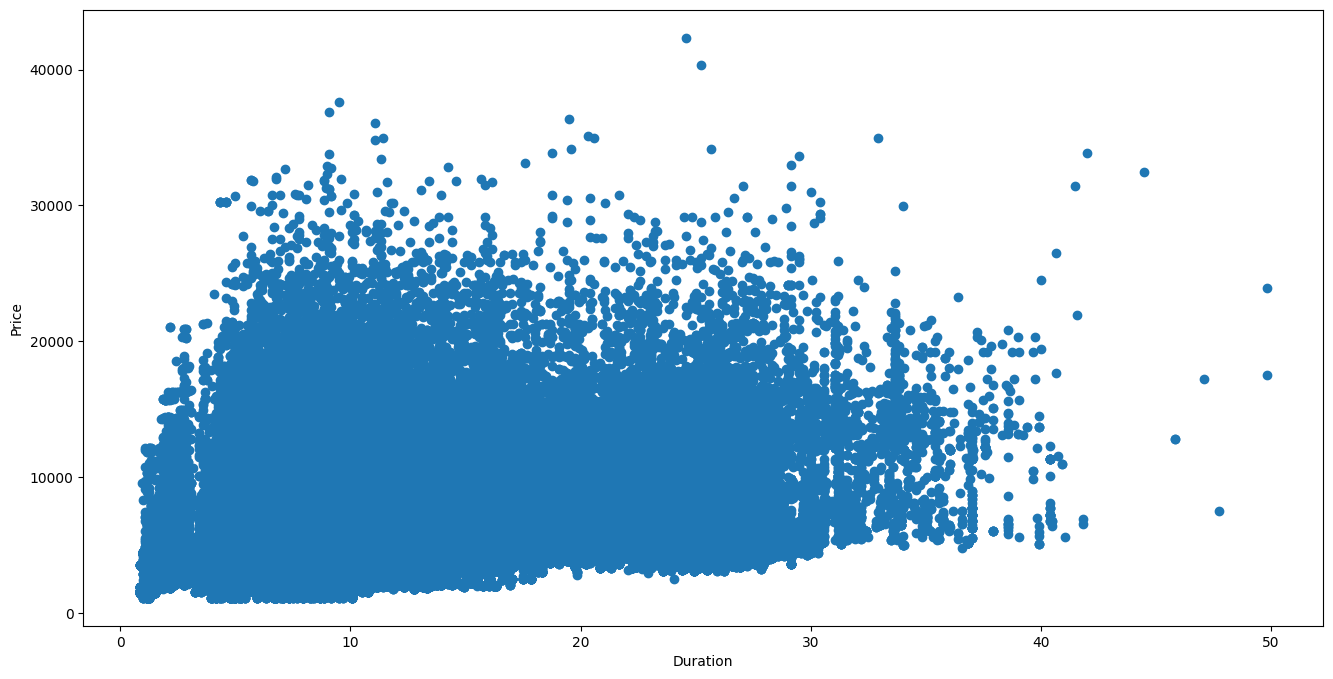

In [37]:
plt.figure(figsize=(16,8))
plt.scatter(y=df_eco['price'], x=df_eco["duration"])
plt.xlabel("Duration")
plt.ylabel("Price")
plt.show()

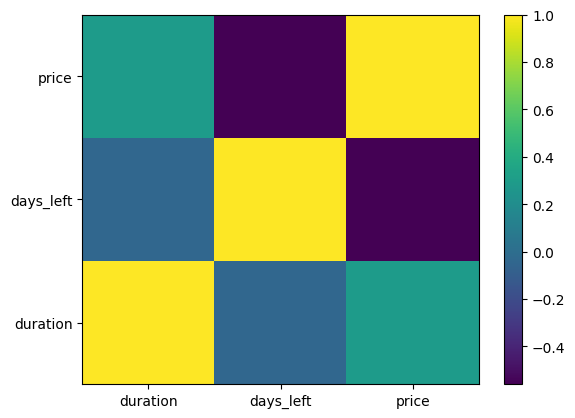

In [38]:
# 상관계수 데이터 만듬
heat = df_eco.corr(numeric_only=True)
# 상관계수로 히트맵 그리기
plt.pcolor(heat)
plt.xticks(np.arange(0.5,len(heat.columns),1),heat.columns)
plt.yticks(np.arange(0.5,len(heat.index),1),heat.columns)
plt.colorbar()
plt.show()

seaborn은 matplotlib으로 만들어진 모듈로 matplotlib 보다 간결한 구문과 더 많은 색 표현으로 인해 많이 쓴다.

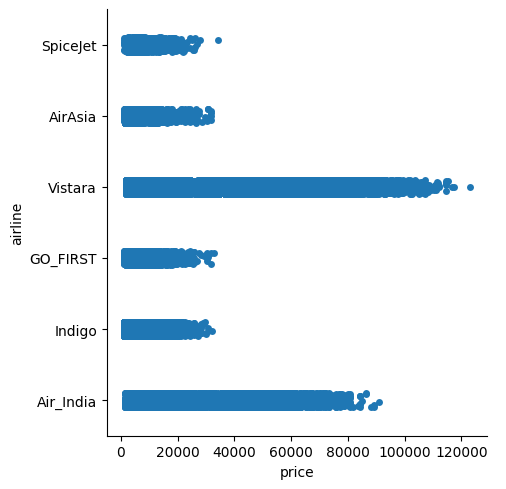

In [ ]:
import seaborn as sns
sns.catplot(y="airline",x="price",col='class',data=df)

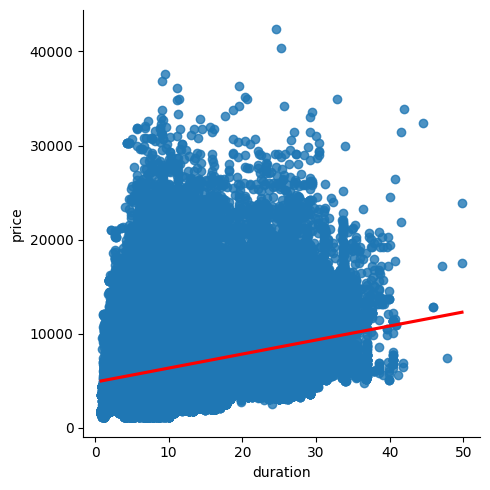

In [43]:
sns.lmplot(x='duration',y='price',data=df_eco,line_kws={"color" : "red"})

<Axes: xlabel='airline', ylabel='count'>

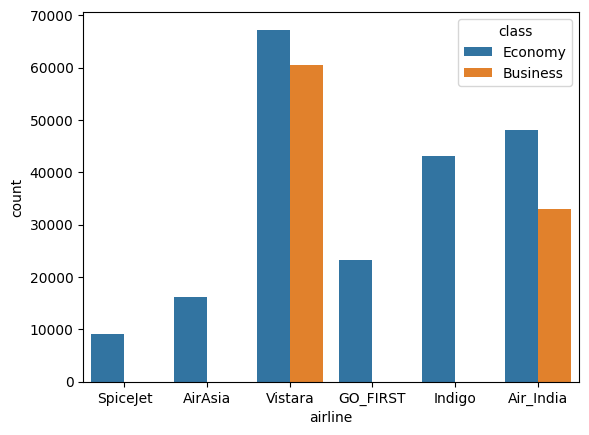

In [44]:
sns.countplot(x="airline",hue='class', data=df)

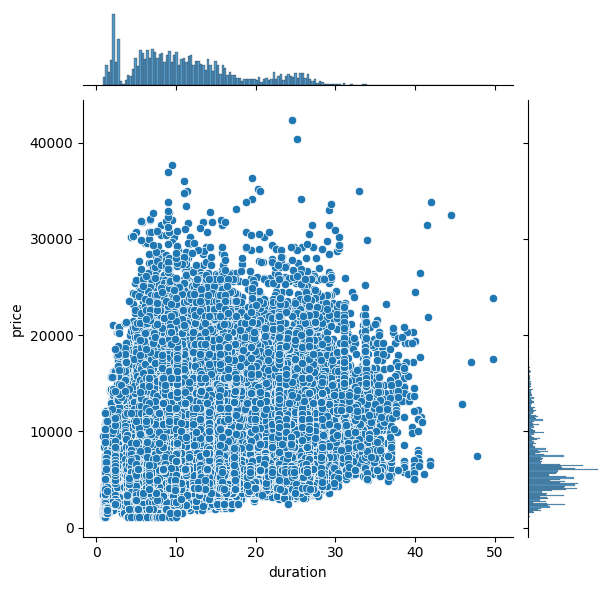

In [45]:
sns.jointplot(y="price",x="duration",data=df_eco)

<Axes: >

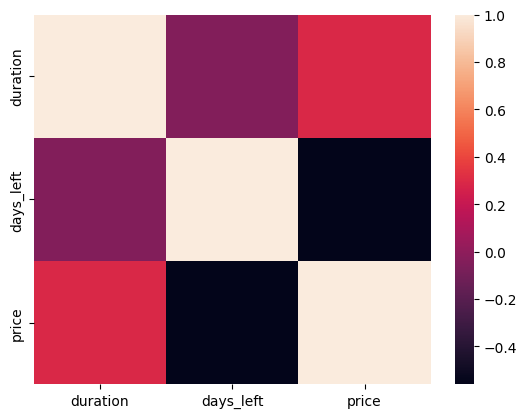

In [46]:
sns.heatmap(df_eco.corr(numeric_only=True))